In [1]:
!pip install requests

In [136]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
import requests 
import json

def request_json (url):
    return json.loads(
           requests.get(url, headers={
            'Accept':'application/json'}).content)

my_url = 'https://www.predictit.org/api/marketdata/ticker/RNOM16'
request_json(url)

{u'Contracts': [{u'BestBuyNoCost': None,
   u'BestBuyYesCost': None,
   u'BestSellNoCost': None,
   u'BestSellYesCost': None,
   u'DateEnd': u'2016-09-15T00:00:00',
   u'ID': 838,
   u'Image': u'https://az620379.vo.msecnd.net/images/Contracts/small_243e34f4-df9f-4e80-9e61-9db22d2d5839.jpg',
   u'LastClosePrice': 0.99,
   u'LastTradePrice': 0.99,
   u'LongName': u'Will Donald Trump win the 2016 Republican presidential nomination?',
   u'Name': u'Donald Trump',
   u'ShortName': u'Trump',
   u'Status': u'Closed',
   u'TickerSymbol': u'TRUMP.RNOM16',
   u'URL': u'https://www.PredictIt.org/Contract/838/Will-Donald-Trump-win-the-2016-Republican-presidential-nomination'},
  {u'BestBuyNoCost': None,
   u'BestBuyYesCost': None,
   u'BestSellNoCost': None,
   u'BestSellYesCost': None,
   u'DateEnd': u'2016-09-15T00:00:00',
   u'ID': 438,
   u'Image': u'https://az620379.vo.msecnd.net/images/Contracts/small_1b2989b5-36f4-40eb-9261-d497684c79a0.jpg',
   u'LastClosePrice': 0.01,
   u'LastTradePrice'

In [35]:
def predictit (ticker):
    return request_json('https://www.predictit.org/api/marketdata/ticker/' + ticker)

def dem_predictit (state_abbreviation):
    market = predictit('DEM.'+state_abbreviation+'.USPREZ16')
    def is_dem (contract):
        return contract['ShortName'] == 'Democratic'
    contracts = market['Contracts']
    dems = filter(is_dem, contracts)[0]
    def average_yes (contract):
        return (contract['BestBuyYesCost'] + contract['BestSellYesCost'])/2
    return average_yes(dems)

dem_predictit('CA')


0.955

In [39]:
def state (abbrev, delegates):
    return {
           "abbreviation": abbrev,
           "delegates": delegates,
           "dem-probability": dem_predictit(abbrev),
           }

states_delegates = {
'AL':9,
'AK':3,
'AZ':11,
'AR':6,
'CA':55,
'CO':9,
'CT':7,
'DC':3,
'DE':3,
'FL':29,
'GA':16,
'HI':4,
'ID':4,
'IL':20,
'IN':11,
'IA':6,
'KS':6,
'KY':8,
'LA':8,
'ME':4,
'MD':10,
'MA':11,
'MI':16,
'MN':10,
'MS':6,
'MO':10,
'MT':3,
'NE':5,
'NV':6,
'NH':4,
'NJ':14,
'NM':5,
'NY':29,
'NC':15,
'ND':3,
'OH':18,
'OK':7,
'OR':7,
'PA':20,
'RI':4,
'SC':9,
'SD':3,
'TN':11,
'TX':38,
'UT':6,
'VT':3,
'VA':13,
'WA':12,
'WV':5,
'WI':10,
'WY':3,
}

states = [state(key,val) for key, val in states_delegates.iteritems()]
states


[{'abbreviation': 'WA', 'delegates': 12, 'dem-probability': 0.95},
 {'abbreviation': 'WI', 'delegates': 10, 'dem-probability': 0.88},
 {'abbreviation': 'WV',
  'delegates': 5,
  'dem-probability': 0.05500000000000001},
 {'abbreviation': 'FL', 'delegates': 29, 'dem-probability': 0.795},
 {'abbreviation': 'WY', 'delegates': 3, 'dem-probability': 0.08},
 {'abbreviation': 'NH', 'delegates': 4, 'dem-probability': 0.865},
 {'abbreviation': 'NJ', 'delegates': 14, 'dem-probability': 0.945},
 {'abbreviation': 'NM', 'delegates': 5, 'dem-probability': 0.895},
 {'abbreviation': 'NC', 'delegates': 15, 'dem-probability': 0.785},
 {'abbreviation': 'ND', 'delegates': 3, 'dem-probability': 0.125},
 {'abbreviation': 'NE', 'delegates': 5, 'dem-probability': 0.1},
 {'abbreviation': 'NY', 'delegates': 29, 'dem-probability': 0.945},
 {'abbreviation': 'RI', 'delegates': 4, 'dem-probability': 0.94},
 {'abbreviation': 'NV', 'delegates': 6, 'dem-probability': 0.78},
 {'abbreviation': 'CO', 'delegates': 9, 'dem-

In [134]:
# sanity check - do delegates add up to fivethirtyeight?
538 == sum([val for key, val in states_delegates.iteritems()])


True

In [119]:
import random
def win (probability):
    return random.random()<probability
    
def allocate_delegates (state):
    '''
    Simulates an election in the state.
    Returns a number of delegates allocated to dems (0 if dem loss).
    '''
    return state['delegates'] * win(state['dem-probability'])

allocate_delegates(states[0])

12

In [155]:
def hold_election (_):
    return sum(map(allocate_delegates, states))

simulations = map(hold_election, range(1000000))

len(simulations)


1000000

In [158]:
# percent over 270?
def winning (delegates):
    return delegates >= 270

len(filter(winning, simulations))/1000000.0


0.987564

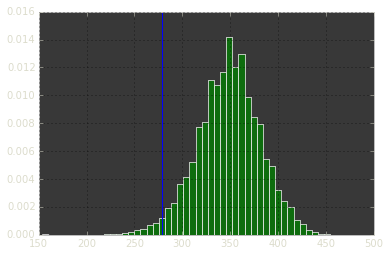

In [157]:
plt.hist(simulations, 50, normed=1, facecolor='green', alpha=0.75)
plt.axvline(x=279)
